In [3]:
import pandas as pd

In [8]:
hitters = pd.read_csv("hitters.csv")
df = hitters.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [12]:
dummies = pd.get_dummies(df[["League","Division","NewLeague"]])
dummies = dummies.drop(["League_A","Division_E","NewLeague_A"],axis = 1).astype("float64")

In [14]:
x = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
y = df["Salary"]
x = pd.concat([x,y],axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [16]:
x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

In [17]:
from sklearn.svm import SVR

In [23]:
svr_model = SVR(kernel = "linear").fit(x_train,y_train)

In [25]:
import matplotlib.pyplot as plt

In [27]:
y_tahmin = svr_model.predict(x_train)

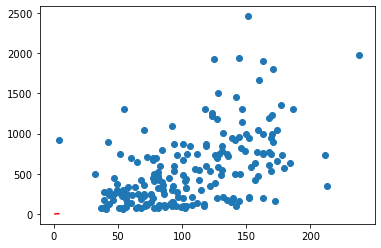

In [32]:
plt.scatter(x_train,y_train)
plt.plot([1,2,3,4],[1,2,3,4],color = "r")